In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.plotly as py
import plotly.graph_objs as go
import pylab as plt2
from pylab import rcParams
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
os.chdir('/home/roman/Documents/Projects/Coding_challenges/Jumpman23')

In [ ]:
# remove rows with customers that already appeared before:
data_ud = data
deliver_ids_appeared = []
deliver_id_first_time = []
for id_ in data_cr['deliver_id']:
    if id_ in deliver_ids_appeared:
        deliver_id_first_time.append(False)
    else:
        deliver_id_first_time.append(True)
        deliver_ids_appeared.append(id_)
data_ud['deliver_id_first_time'] = deliver_id_first_time
data_ud = data_ud[data_ud['deliver_id_first_time']]

In [77]:
data = pd.read_csv('analyze_me.csv')
data.info()
##data.place_category = data.place_category.fillna('Unknown')
# data.item_name = data.item_name.fillna('Unknown')
# data.item_category_name = data.item_category_name.fillna('Unknown')
# data.item_quantity = data.item_quantity.fillna(1)
# data.head()
#data.groupby('delivery_id')#.agg('count')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 18 columns):
delivery_id                            5983 non-null int64
customer_id                            5983 non-null int64
jumpman_id                             5983 non-null int64
vehicle_type                           5983 non-null object
pickup_place                           5983 non-null object
place_category                         5100 non-null object
item_name                              4753 non-null object
item_quantity                          4753 non-null float64
item_category_name                     4753 non-null object
how_long_it_took_to_order              3038 non-null object
pickup_lat                             5983 non-null float64
pickup_lon                             5983 non-null float64
dropoff_lat                            5983 non-null float64
dropoff_lon                            5983 non-null float64
when_the_delivery_started              5983 non-nul

In [81]:
#pd.to_datetime(data.how_long_it_took_to_order)
#how_long_it_took_to_order
pd.Timestamp(data.how_long_it_took_to_order[0]).minute
data['how_long_it_took_to_order_min'] = data.how_long_it_took_to_order.\
    apply(lambda x: pd.Timestamp(x).minute + 1/60 * pd.Timestamp(x).second)
#pd.Period.strftime(pd.Timestamp(data.how_long_it_took_to_order[0]))
#data.how_long_it_took_to_order[0]
5983-5433

550

In [76]:
#data.customer_id.unique().shape
data[data.delivery_id==1475127]
#data[data.delivery_id==1343610]
#data[data.delivery_id==1397032 ]
#data[data.delivery_id==1482492 ]
pd.Timestamp
data['how_long_it_took_to_order_min'].min()

1.3666666666666667

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 18 columns):
delivery_id                            5983 non-null int64
customer_id                            5983 non-null int64
jumpman_id                             5983 non-null int64
vehicle_type                           5983 non-null object
pickup_place                           5983 non-null object
place_category                         5983 non-null object
item_name                              5983 non-null object
item_quantity                          5983 non-null float64
item_category_name                     5983 non-null object
how_long_it_took_to_order              3038 non-null object
pickup_lat                             5983 non-null float64
pickup_lon                             5983 non-null float64
dropoff_lat                            5983 non-null float64
dropoff_lon                            5983 non-null float64
when_the_delivery_started              5983 non-nul

In [5]:
#data.when_the_Jumpman_arrived_at_pickup - data.when_the_delivery_started

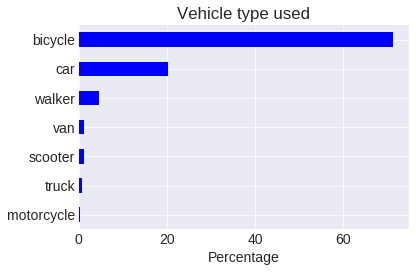

In [274]:
total_n = data.vehicle_type.value_counts().sum()
vehicle_type = data.vehicle_type.value_counts()[::-1] / (total_n / 100)
#top_30_place_cat['other'] = data.place_category.value_counts()[30:].sum()
#top_30_place_cat = top_30_place_cat[::-1] / (total_n / 100)
rcParams['figure.figsize'] = 6, 4
plt.rcParams.update({'font.size': 14})
plt.style.use('seaborn-darkgrid')
# plt.barh(top_30_place_cat.index, top_30_place_cat)

# plt.show()
vehicle_type.plot.barh(color='blue')
plt.title('Vehicle type used')
plt.xlabel('Percentage')
plt.tight_layout()
plt.show()

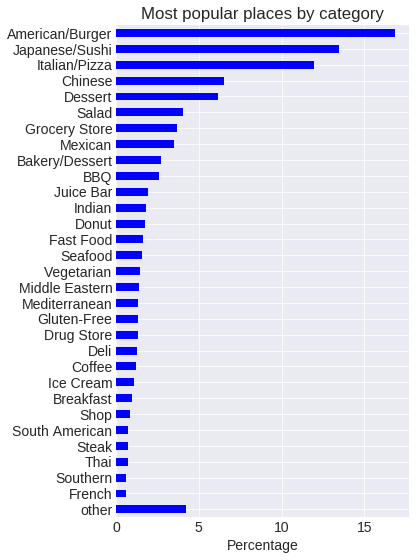

In [276]:
total_n = data.place_category.value_counts().sum()
top_30_place_cat = data.place_category.value_counts()[:30]
top_30_place_cat['other'] = data.place_category.value_counts()[30:].sum()
top_30_place_cat = top_30_place_cat[::-1] / (total_n / 100)
rcParams['figure.figsize'] = 6, 8
plt.rcParams.update({'font.size': 14})
plt.style.use('seaborn-darkgrid')

top_30_place_cat.plot.barh(color='blue')
plt.title('Most popular places by category')
plt.xlabel('Percentage')
plt.tight_layout()
plt.show()

In [278]:
data.place_category = data.place_category.apply(lambda x: 'American/Burger' if x in ['Burger', 'American'] else x)
data.place_category = data.place_category.apply(lambda x: 'Italian/Pizza' if x in ['Italian', 'Pizza'] else x)
data.place_category = data.place_category.apply(lambda x: 'Japanese/Sushi' if x in ['Japanese', 'Sushi'] else x)
data.place_category = data.place_category.apply(lambda x: 'Bakery/Dessert' if x in ['Bakery', 'Dessert'] else x)
#data.place_category = data.place_category.apply(lambda x: x in ['Burger', 'American'])
#data.place_category

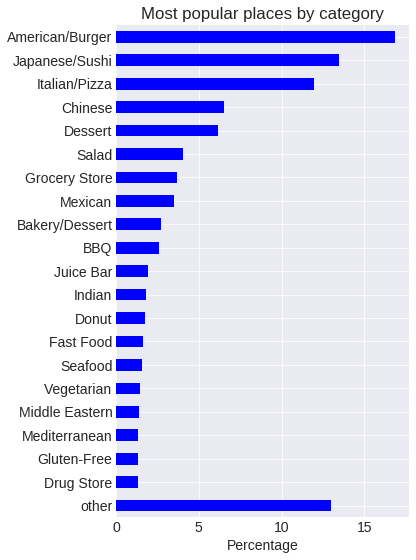

In [290]:
total_n = data.place_category.value_counts().sum()
top_30_place_cat = data.place_category.value_counts()[:20]
top_30_place_cat['other'] = data.place_category.value_counts()[20:].sum()
top_30_place_cat = top_30_place_cat[::-1] / (total_n / 100)
rcParams['figure.figsize'] = 6, 8
plt.rcParams.update({'font.size': 14})
#plt.style.use('seaborn-darkgrid')

top_30_place_cat.plot.barh(color='blue')
plt.title('Most popular places by category')
plt.xlabel('Percentage')
plt.tight_layout()
plt.show()

In [29]:
data = pd.read_csv('analyze_me.csv')
data.place_category = data.place_category.fillna('Unknown')
data.item_name = data.item_name.fillna('Unknown')
data.item_category_name = data.item_category_name.fillna('Unknown')
data.item_quantity = data.item_quantity.fillna(1)
data.head()
#data.groupby('delivery_id')#.agg('count')

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


In [30]:
type(data.when_the_delivery_started[0])
data.when_the_delivery_started = pd.to_datetime(data.when_the_delivery_started)
data.when_the_Jumpman_arrived_at_pickup = pd.to_datetime(data.when_the_Jumpman_arrived_at_pickup)
data.when_the_Jumpman_left_pickup = pd.to_datetime(data.when_the_Jumpman_left_pickup)
data.when_the_Jumpman_arrived_at_dropoff = pd.to_datetime(data.when_the_Jumpman_arrived_at_dropoff)
data['time_delivery'] = data.when_the_Jumpman_arrived_at_dropoff - data.when_the_delivery_started
data['time_JM_to_pickup'] = data.when_the_Jumpman_arrived_at_pickup - data.when_the_delivery_started
data['time_JM_wait'] = data.when_the_Jumpman_left_pickup - data.when_the_Jumpman_arrived_at_pickup
data['time_JM_to_dropoff'] = data.when_the_Jumpman_arrived_at_dropoff - data.when_the_Jumpman_left_pickup

In [31]:
recorded_late_when_delivery_started = data['time_JM_to_pickup'].apply(lambda x: x.days) < 0 
data.when_the_delivery_started[recorded_late_when_delivery_started] = pd.NaT
data['time_JM_to_pickup'][recorded_late_when_delivery_started] = pd.NaT
data.when_the_delivery_started

#data['time_JM_to_pickup']
#recorded_late_when_delivery_started

0      2014-10-26 13:51:59.898924
1      2014-10-16 21:58:58.654910
2                             NaT
3      2014-10-30 10:54:11.531894
4      2014-10-10 00:07:18.450505
5      2014-10-22 18:56:36.348939
6                             NaT
7                             NaT
8      2014-10-30 16:49:48.259935
9      2014-10-21 21:18:37.909545
10     2014-10-10 19:08:02.254120
11     2014-10-30 20:06:57.238098
12     2014-10-05 18:47:28.819056
13     2014-10-07 12:55:04.793821
14     2014-10-21 15:15:32.673629
15     2014-10-06 12:02:01.155212
16     2014-10-01 18:17:51.625284
17     2014-10-26 16:50:52.754548
18                            NaT
19     2014-10-21 19:44:51.144311
20     2014-10-21 10:08:40.392943
21     2014-10-13 18:00:38.265026
22     2014-10-08 20:53:52.039403
23     2014-10-15 22:10:13.616511
24     2014-10-30 17:36:13.679620
25     2014-10-14 11:32:50.353130
26     2014-10-26 16:14:29.755984
27     2014-10-22 10:05:54.955054
28     2014-10-07 20:18:32.473578
29     2014-10

In [38]:
data['time_JM_to_pickup'].count()

4932

In [39]:
4932+501+550

5983

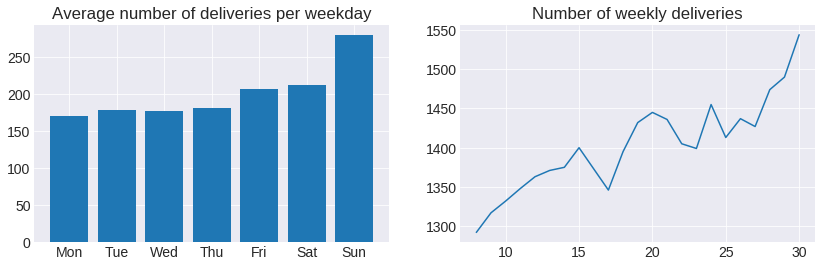

In [281]:
# Activity per weekday:
#weekday_dict = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
data['weekday'] = data.when_the_delivery_started.apply(lambda x: x.weekday())
deliveries_per_weekday = data.weekday.value_counts().sort_index()

unique_days = data.when_the_delivery_started.apply(lambda x: x.date()).unique()
from collections import defaultdict
d = defaultdict(int)
for day in unique_days:
    d[day.weekday()] += 1

deliveries_per_weekday = list(data.when_the_delivery_started.apply(lambda x: x.weekday()).value_counts().sort_index())
# count number of deliveries for each weekday (some appear 4 times, others 5 times)
deliveries_per_weekday_norm = []
for i, deliveries in enumerate(deliveries_per_weekday):
    deliveries_per_weekday_norm.append(deliveries/d[i])
    
# Activity over month
deliveries_per_day = data.when_the_delivery_started.apply(lambda x: x.day).value_counts().sort_index()
deliveries_per_week = deliveries_per_day.rolling(7).sum()[7:]

rcParams['figure.figsize'] = 14, 4
plt.subplot(1, 2, 1)
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
rcParams['figure.figsize'] = 8, 4
plt.bar(weekday_labels, deliveries_per_weekday_norm)
plt.title('Average number of deliveries per weekday')
#plt.show()
plt.subplot(1, 2, 2)
plt.title('Number of weekly deliveries')
plt.plot(deliveries_per_week)
plt.show()


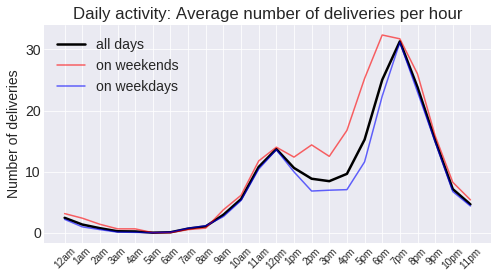

In [282]:
# Activity over day
n_days = deliveries_per_day.index.max() - deliveries_per_day.index.min() + 1
n_weekend_days = d[5] + d[6]
n_week_days = n_days - n_weekend_days

deliveries_per_hour = data.when_the_delivery_started.apply(lambda x: x.hour).value_counts()
deliveries_per_hour /= n_days

# take a separate look at weekdays vs weekends 
data_weekend = data[(data.weekday == 5) | (data.weekday == 6)]
deliveries_per_hour_weekend = data_weekend.when_the_delivery_started.apply(lambda x: x.hour).value_counts()
deliveries_per_hour_weekend /= n_weekend_days

data_weekdays = data[(data.weekday != 5) & (data.weekday != 6)]
deliveries_per_hour_weekdays = data_weekdays.when_the_delivery_started.apply(lambda x: x.hour).value_counts()
deliveries_per_hour_weekdays /= n_week_days

for i in range(24):
    if i not in deliveries_per_hour.index:
        deliveries_per_hour[i] = 0
    if i not in deliveries_per_hour_weekend.index:
        deliveries_per_hour_weekend[i] = 0
    if i not in deliveries_per_hour_weekdays.index:
        deliveries_per_hour_weekdays[i] = 0
        
deliveries_per_hour = deliveries_per_hour.sort_index()
deliveries_per_hour_weekend = deliveries_per_hour_weekend.sort_index()
deliveries_per_hour_weekdays = deliveries_per_hour_weekdays.sort_index()

am = [str(i) + 'am' for i in range(1, 13)]
pm = [str(i) + 'pm' for i in range(1, 13)]
hour_labels = [am[-1]] + am[:-1] + [pm[-1]] + pm[:-1]

rcParams['figure.figsize'] = 8, 4
x = list(deliveries_per_hour.index)
y_all = list(deliveries_per_hour.values)
y_weekend = list(deliveries_per_hour_weekend.values)
y_weekdays = list(deliveries_per_hour_weekdays.values)

plt2.plot(y_all, alpha=1, c='black', linewidth=2.5)
plt2.plot(y_weekend, alpha=0.6, c='red')
plt2.plot(y_weekdays, alpha=0.6, c='blue')
plt2.xticks(x, hour_labels, rotation='45', fontsize=10)#, minor=True)
plt2.ylabel('Number of deliveries')
plt2.title('Daily activity: Average number of deliveries per hour')
plt.legend(['all days', 'on weekends', 'on weekdays'])
plt2.show()

In [70]:
# map scope
#pickup_lat 	pickup_lon 	dropoff_lat 	dropoff_lon
min_lon = min(min(data.pickup_lon), min(data.dropoff_lon))
max_lon = max(max(data.pickup_lon), max(data.dropoff_lon))
min_lat = min(min(data.pickup_lat), min(data.dropoff_lat))
max_lat = max(max(data.pickup_lat), max(data.dropoff_lat))
print('lon: ' + str(np.round(min_lon, 3)) + ' ' + str(np.round(max_lon, 3)))
print('lat: ' + str(np.round(min_lat, 3)) + ' ' + str(np.round(max_lat, 3)))
# map: [-74.053, -73.8725], [40.6425, 40.865]


lon: -74.018 -73.921
lat: 40.649 40.848


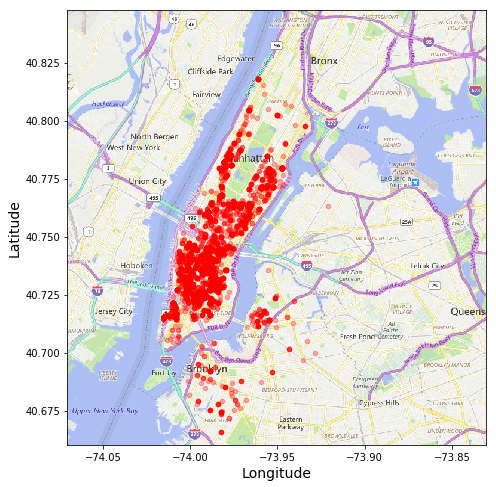

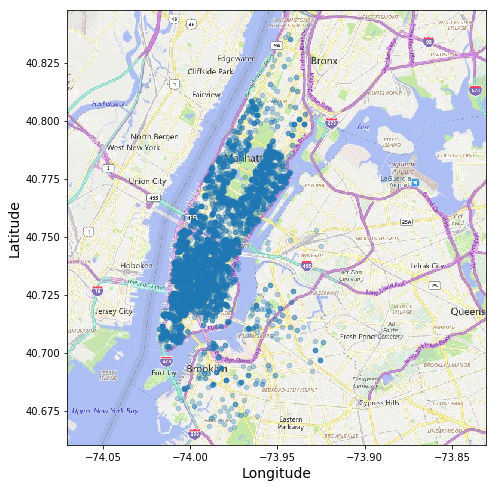

In [18]:
#plt.style.use('seaborn-darkgrid')
plt.style.use('fast')
ax1 = data.plot(kind="scatter", x="pickup_lon", y="pickup_lat", figsize=(12,8), c='r', alpha=0.3)#,
nyc_map=mpimg.imread('nyc_map2.png')
plt.imshow(nyc_map, extent=[-74.07065, -73.830665, 40.660223, 40.847736], aspect=1.33)#1.3)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

plt.style.use('fast')
ax2 = data.plot(kind="scatter", x="dropoff_lon", y="dropoff_lat", figsize=(12,8), alpha=0.3)
#                        s=housing['population']/100, label="Population",
#                        c="median_house_value", cmap=plt.get_cmap("jet"),
#                        colorbar=False, alpha=0.4,
#                       )
nyc_map=mpimg.imread('nyc_map2.png')
plt.imshow(nyc_map, extent=[-74.07065, -73.830665, 40.660223, 40.847736], aspect=1.33)#1.3)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.show()

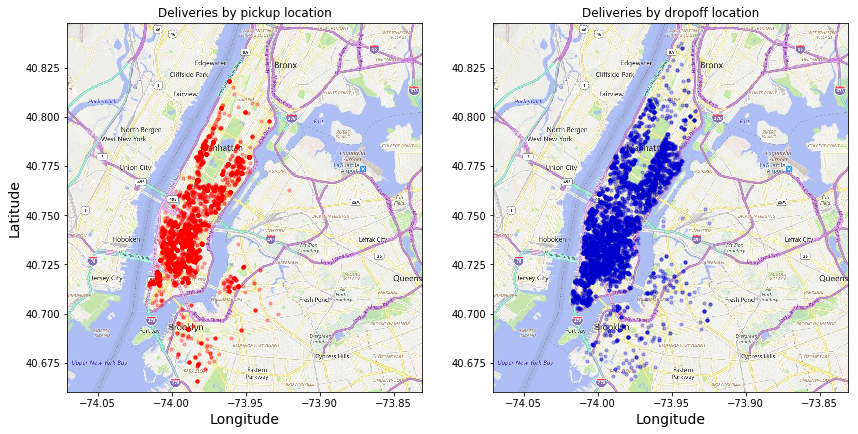

In [35]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))

ax1.scatter(x=data["pickup_lon"], y=data["pickup_lat"], c='red', s=10, alpha=0.3)#,
#ax1 = data.plot(kind="scatter", x="pickup_lon", y="pickup_lat", figsize=(12,8), c='r', alpha=0.3)#,
nyc_map=mpimg.imread('nyc_map2.png')
ax1.imshow(nyc_map, extent=[-74.07065, -73.830665, 40.660223, 40.847736], aspect=1.33)#1.3)
ax1.set_ylabel("Latitude", fontsize=14)
ax1.set_xlabel("Longitude", fontsize=14)
ax1.set_title('Deliveries by pickup location')
#plt.show()

#plt.style.use('fast')
ax2.scatter(x=data["dropoff_lon"], y=data["dropoff_lat"], c='mediumblue', s=10, alpha=0.3)#,
#ax2 = data.plot(kind="scatter", x="dropoff_lon", y="dropoff_lat", figsize=(12,8), alpha=0.3)
#nyc_map=mpimg.imread('nyc_map2.png')
ax2.imshow(nyc_map, extent=[-74.07065, -73.830665, 40.660223, 40.847736], aspect=1.33)#1.3)
ax2.set_ylabel(" ")
ax2.set_xlabel("Longitude", fontsize=14)
ax2.set_title('Deliveries by dropoff location')
plt.show()

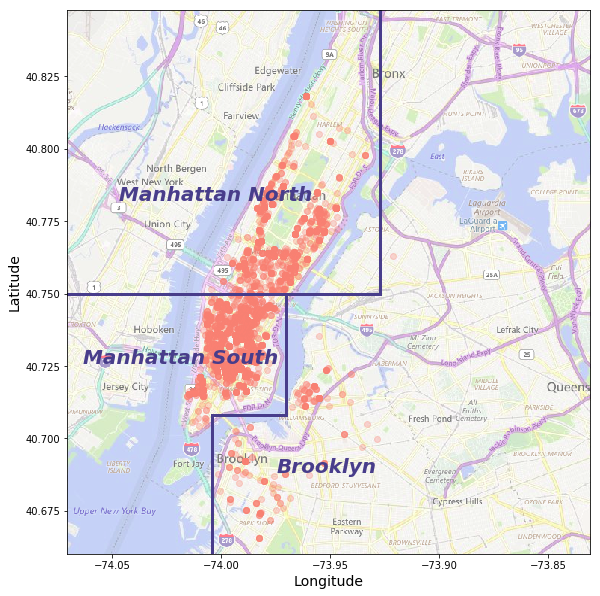

In [29]:
nyc_map = mpimg.imread('nyc_map2.png')

# scatter plot with pickup locations:
plt.style.use('fast')
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111)
ax.scatter(x=data["pickup_lon"], y=data["pickup_lat"], c='salmon', alpha=0.3)#,

# plot lines for area segmentation and annotation:
x_left = -74.07065
x_right = -73.830665
y_bottom = 40.660223
y_top = 40.847736
pntA = (-73.927, 40.75)
pntB = (-73.97, 40.75)
pntC = (-73.97, 40.708)
pntD = (-74.004, 40.708)
c = 'darkslateblue'
ax.axvline(x=pntA[0], ymin=(pntA[1]-y_bottom)/(y_top-y_bottom), ymax=1, \
           linewidth=3, color=c)
ax.axhline(y=pntB[1], xmin=0, xmax=(pntA[0]-x_left)/(x_right-x_left), linewidth=3, color=c)
ax.axvline(x=pntC[0], ymin=(pntC[1]-y_bottom)/(y_top-y_bottom), ymax=(pntB[1]-y_bottom)/(y_top-y_bottom), \
           linewidth=3, color=c)
ax.axhline(y=pntC[1], xmin=(pntD[0]-x_left)/(x_right-x_left), xmax=(pntC[0]-x_left)/(x_right-x_left),\
           linewidth=3, color=c)
ax.axvline(x=pntD[0], ymin=0, ymax=(pntD[1]-y_bottom)/(y_top-y_bottom), linewidth=3, color=c)
ax.text(0.1, 0.65, 'Manhattan North', transform=ax.transAxes,fontsize=20, style='italic', weight='bold', color=c)
ax.text(0.03, 0.35, 'Manhattan South', transform=ax.transAxes,fontsize=20, style='italic', weight='bold', color=c)
ax.text(0.4, 0.15, 'Brooklyn', transform=ax.transAxes,fontsize=20, style='italic', weight='bold', color=c)
ax.set_ylabel("Latitude", fontsize=14)
ax.set_xlabel("Longitude", fontsize=14)
# plot map:
ax.imshow(nyc_map, extent=[x_left, x_right, y_bottom, y_top], alpha=0.7, aspect=1.33)
plt.show()

In [283]:
# add pickup area to dataset
pntA = (-73.927, 40.75)
pntB = (-73.97, 40.75)
pntC = (-73.97, 40.708)
pntD = (-74.004, 40.708)
pickup_lat = data.pickup_lat
pickup_lon = data.pickup_lon
pickup_area = []
for lat, lon in zip(pickup_lat, pickup_lon):
    if lat >= pntA[1]:
        if lon <= pntA[0]:
            pickup_area.append('Manhattan North')
        else:
            pickup_area.append('Brooklyn')
    elif lat >= pntC[1]:
        if lon <= pntC[0]:
            pickup_area.append('Manhattan South')
        else:
            pickup_area.append('Brooklyn')
    else:
        if lon <= pntD[0]:
            pickup_area.append('Manhattan South')
        else:
            pickup_area.append('Brooklyn')
data['pickup_area'] = pickup_area            

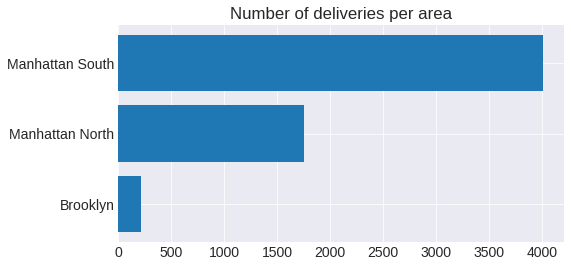

In [284]:
pickup_area_counts = data['pickup_area'].value_counts()[::-1]
#data['pickup_area'].value_counts().plot(kind='bar')
plt.style.use('seaborn-darkgrid')
plt.rcParams.update({'font.size': 14})
plt.barh(pickup_area_counts.index, pickup_area_counts.values)
plt.title('Number of deliveries per area')
plt.show()

In [285]:
# Analyze customer retention:
data_cr = data[data['when_the_delivery_started'].apply(lambda x: x.day) <= n_days - 7]
data_cr.groupby('customer_id').agg('count')
returning_costumers = pd.DataFrame(data['customer_id'].value_counts() > 1)
return_customer = []
for id_ in data_cr['customer_id']:
    if returning_costumers.loc[id_].bool():
        return_customer.append(1)
    else:
        return_customer.append(0)
data_cr['return_customer'] = return_customer
# removes rows with customers that appeared before:
customer_ids_appeared = []
customer_first_time = []
for id_ in data_cr['customer_id']:
    if id_ in customer_ids_appeared:
        customer_first_time.append(False)
    else:
        customer_first_time.append(True)
        customer_ids_appeared.append(id_)
data_cr['customer_first_time'] = customer_first_time
data_cr = data_cr[data_cr['customer_first_time']]

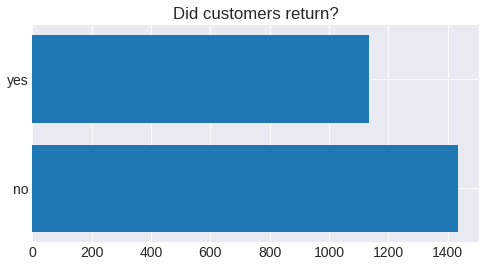

In [286]:
plt.barh(['no', 'yes'], data_cr['return_customer'].value_counts())
plt.title('Did customers return?')
plt.show()

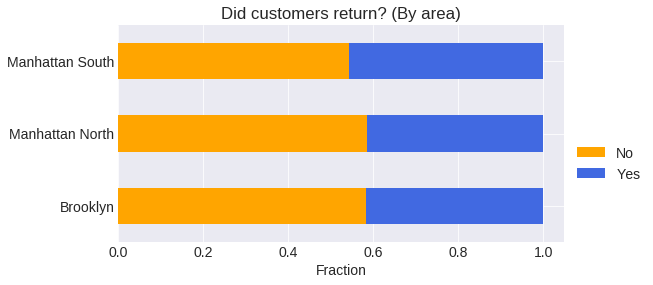

In [287]:
fig, ax = plt.subplots()
ct_return_location = pd.crosstab(data_cr['pickup_area'], data_cr['return_customer'], normalize='index')
ax = ct_return_location.plot(kind='barh', stacked=True, ax=ax, color=['orange', 'royalblue'])
ax.set_ylabel('', fontsize=14)
ax.set_xlabel('Fraction')
ax.legend(['No', 'Yes'], bbox_to_anchor=(1, 0.5))
ax.set_title('Did customers return? (By area)')
plt.show()

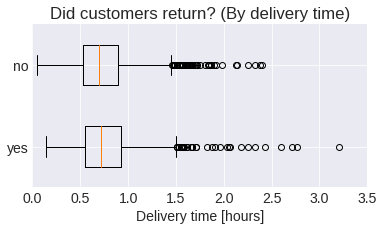

In [288]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.boxplot([data_cr[data_cr.return_customer==1].time_delivery.apply(lambda x: x.seconds/3600), \
             data_cr[data_cr.return_customer==0].time_delivery.apply(lambda x: x.seconds/3600)],\
           widths=(0.5, 0.5), vert=False)
ax.set_yticklabels(['yes', 'no'])
ax.set_xlabel('Delivery time [hours]')
ax.set_xlim(0, 3.5)
ax.set_title('Did customers return? (By delivery time)')
plt.show()

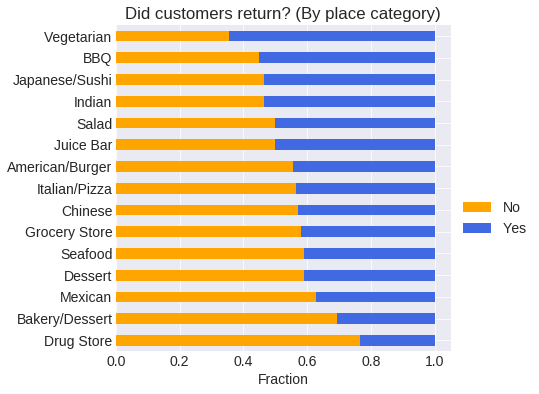

In [289]:
top_15_categories = list(data_cr.place_category.value_counts().iloc[:15].index)
data_cr_top15 = data_cr[data_cr.place_category.isin(top_15_categories)]
ct_return_cat = pd.crosstab(data_cr_top15.place_category, data_cr_top15.return_customer, \
                            normalize='index').sort_values(by=0, ascending=False)

fig, ax = plt.subplots(figsize=(6, 6))
ax = ct_return_cat.plot(kind='barh', stacked=True, ax=ax, color=['orange', 'royalblue'])
ax.set_ylabel('', fontsize=14)
ax.set_xlabel('Fraction')
ax.legend(['No', 'Yes'], bbox_to_anchor=(1, 0.5))
ax.set_title('Did customers return? (By place category)')
plt.show()

In [257]:
ct_return_cat.sort_values(by=0)

return_customer,0,1
place_category,,
BBQ,0.450000,0.550000
Japanese,0.450000,0.550000
Indian,0.465116,0.534884
Sushi,0.485149,0.514851
Juice Bar,0.500000,0.500000
Salad,0.500000,0.500000
American,0.530864,0.469136
Italian,0.560185,0.439815
Chinese,0.571429,0.428571
